<a href="https://colab.research.google.com/github/CyberJuan55/GenderPredict/blob/master/GenderPredict01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, label_binarize
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats

urlTrain  = 'https://raw.githubusercontent.com/CyberJuan55/GenderPredict/master/Dataset/SpotifyFeatures.csv_train.csv'
urlFull = 'https://github.com/CyberJuan55/GenderPredict/blob/master/Dataset/SpotifyFeatures.csv'
urlNuevoDataSet = 'https://github.com/CyberJuan55/GenderPredict/blob/master/Dataset/genres_v2.csv'



df_train_original = pd.read_csv(urlTrain)

df_train = df_train_original.copy()


### Preprocesado de datos y visualizacion 

In [2]:
# Funcion para el preprocesamiento de datos
def preprocesado(df,out=False):

    df.drop_duplicates()
    df.dropna(axis=0, inplace=True)

    #if df.duplicated().sum() == 0:
        #print('no hay datos duplicados')
    #else:
        #df.drop_duplicates
    #if 'Unnamed: 0' in df.columns:
        #df = df.drop(['Unnamed: 0'], axis=1)

    x = ['genre','popularity','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode',
       'speechiness', 'tempo','valence'] 

    df = df[x] 

    df['genre']= df['genre'].replace(["Children’s Music"],"Children's Music")

    #indexNamesChildren = df[ df['genre'] == "Children's Music" ].index
    #df.drop(indexNamesChildren , inplace=True)

    indexNamesAcapella = df[ df['genre'] == "A Capella"].index
    df.drop(indexNamesAcapella , inplace=True)
#-------------------------------------------------------------------------------
 

    #indexPOP = df[df.popularity==0].index
    #df.drop(indexPOP , inplace=True)

    #indexACO = df[df.acousticness < 0.02] .index
    #df.drop(indexACO , inplace=True)
    #indexACO1 = df[df.acousticness > 0.98] .index
    #df.drop(indexACO1 , inplace=True)

    #indexVAL = df[df.valence < 0.08] .index
    #df.drop(indexVAL , inplace=True)
    #indexVAL1 = df[df.valence > 0.9] .index
    #df.drop(indexVAL1 , inplace=True)
#-------------------------------------------------------------------------------

    #cols_with_missing = [col for col in df.columns if df[col].isnull().any()] 
    #faltanDatos = True
    #if len(cols_with_missing)==0:
        #faltanDatos= False
        #print('no faltan valores') 
    #if faltanDatos == True:
        #print(cols_with_missing)
        #df.dropna(axis=0, inplace=True)
#-------------------------------------------------------------------------------
    

    if out == True:
        labelencoder = LabelEncoder()
        df["genre"] = labelencoder.fit_transform(df["genre"])

        df_train_genres = df
        generos=list(df_train['genre'].unique())

        b = []
        for i in generos:
            df=df_train_genres[df_train_genres["genre"]==i].drop(columns=["genre","mode","key"])
     
            z = np.abs(stats.zscore(df))
            a=np.where(z > 3)
            outliers=list(set(list(a[0])))
            ñ = [df.iloc[x,:].name for x in outliers]
            b = ñ + b
        df_train_genres.drop(b, axis = 0, inplace = True)

        df = df_train_genres
#-------------------------------------------------------------------------------
    y = df['genre']    
    X = df.drop(columns=['genre'])
#-------------------------------------------------------------------------------   
    return X,y 


In [3]:
df_train,y = preprocesado(df_train,out=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

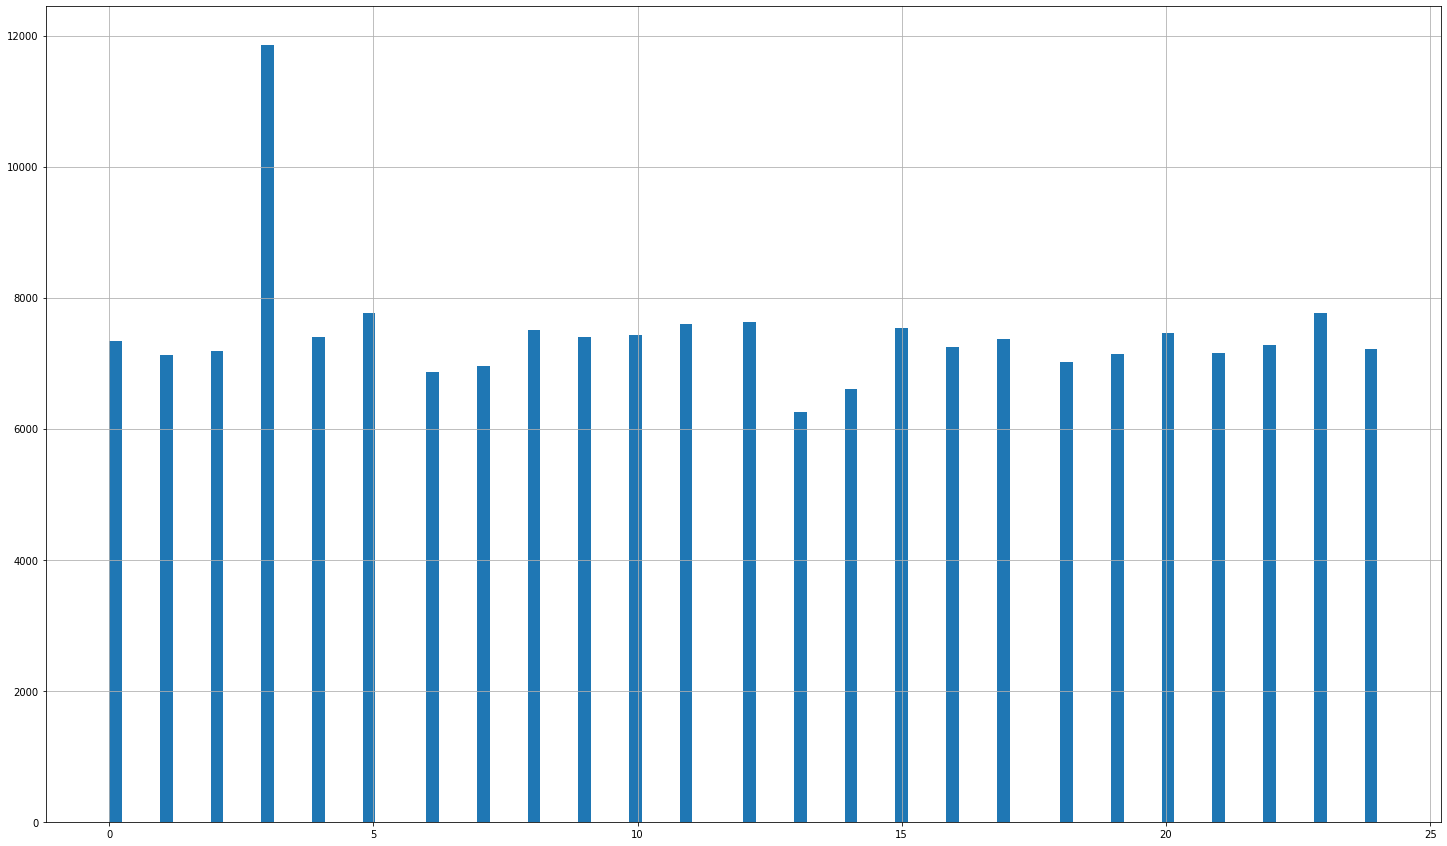

In [4]:
y.hist(bins=100, figsize=(25,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6d50d8810>,
      dtype=object)

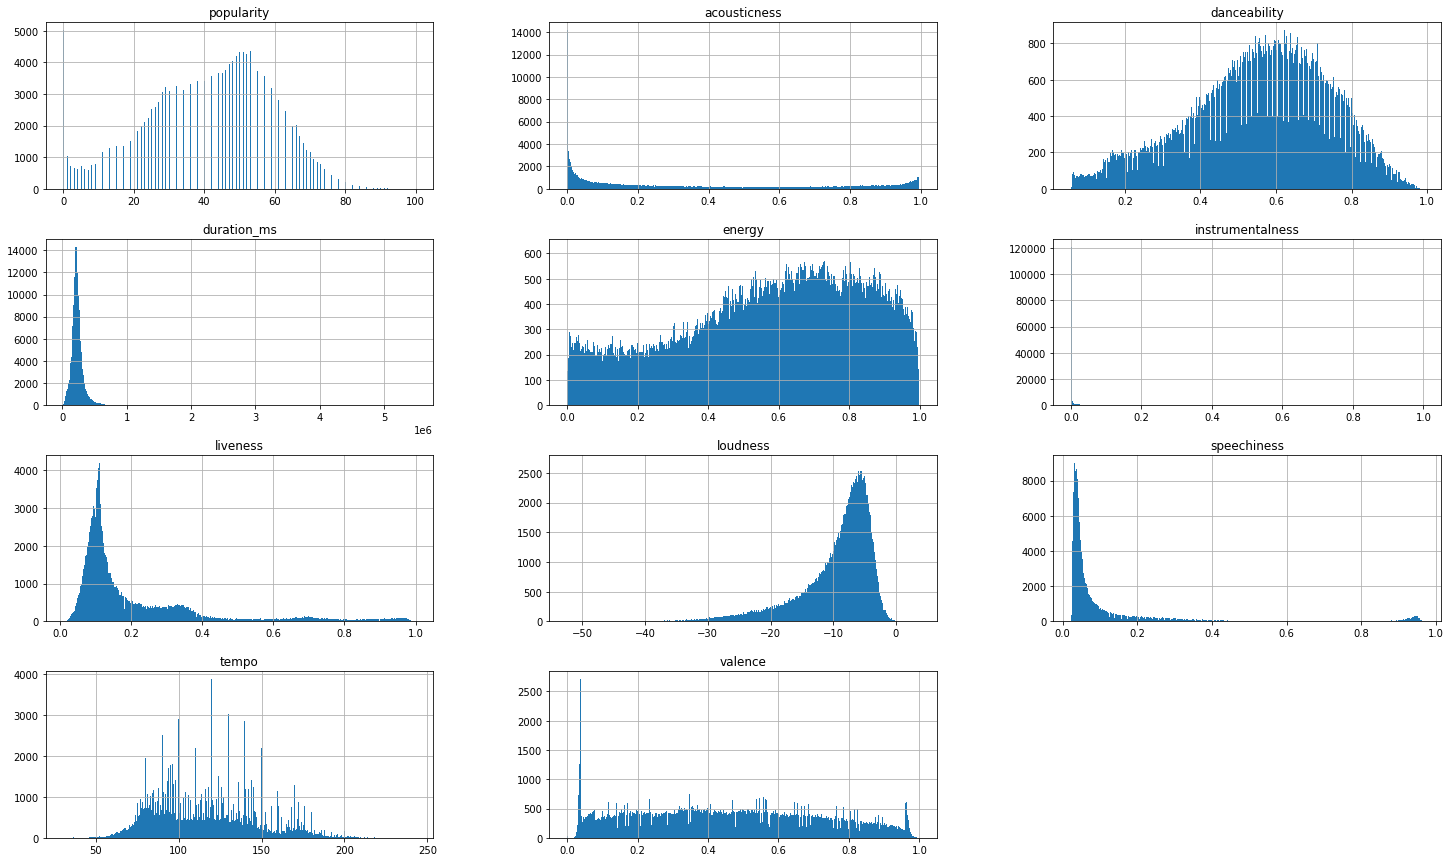

In [5]:
df_train.hist(bins=500, figsize=(25,15))

In [6]:
#Borrar variables categoricas
df_train = df_train.drop(['mode',"key"], axis=1) 

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
X_train_full, X_valid_full, y_train, y_valid = train_test_split(df_train, y, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=42)

In [12]:
df_train_num = df_train.drop(['mode',"key"], axis=1) 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        #('mismax_scaler', MinMaxScaler()),
        #('standar_scaler', StandardScaler()),
        ('Robust_scaler', RobustScaler()),
        #('Normalize', Normalizer()),
    ])
#cat_attribs1 = ["key"]
#cat_attribs2 = ["mode"]
#cat_attribs3 = ["time_signature"]
num_attribs = list(df_train)

full_pipeline = ColumnTransformer([
        ('numerical', num_pipeline, num_attribs),                          
        #("cat", OneHotEncoder(), cat_attribs1),
        #("cat1", OrdinalEncoder(), cat_attribs2),
        #("cat3", OneHotEncoder(), cat_attribs3),
    ])

In [9]:
df_train_processed = full_pipeline.fit_transform(df_train)

In [10]:
df_train_processed

array([[-1.42307692,  0.97618004, -1.65625   , ..., -0.17460317,
         0.4748899 , -0.98293839],
       [-0.61538462, -0.32861318,  1.1171875 , ...,  0.64935065,
        -0.42581267,  0.33649289],
       [ 0.61538462,  0.06283794, -0.20703125, ..., -0.16738817,
        -0.88000997, -0.66824645],
       ...,
       [ 1.11538462, -0.33479468,  0.140625  , ...,  0.62770563,
         0.396258  , -0.59004739],
       [ 0.76923077, -0.00730674,  0.36328125, ...,  0.97979798,
        -0.0535191 ,  0.88151659],
       [-0.57692308,  0.53193044, -1.59375   , ..., -0.09379509,
         0.83816973, -0.7535545 ]])

##PCA

In [12]:
a = pd.DataFrame(df_train_processed)

In [13]:
a

,0,1,2,3,4,5,6,7,8,9,10
0,-1.423077,0.976180,-1.656250,-1.068026,-1.471322,26.599876,-0.234694,-2.640510,-0.174603,0.474890,-0.982938
1,-0.615385,-0.328613,1.117187,0.418924,-0.017456,0.001152,0.486194,0.332376,0.649351,-0.425813,0.336493
2,0.615385,0.062838,-0.207031,0.175063,-0.152120,-0.000598,0.330132,-0.021053,-0.167388,-0.880010,-0.668246
3,0.384615,0.530469,-0.121094,-0.080166,0.022444,22.554933,-0.048019,-0.239713,-0.232323,-0.487609,-0.485782
4,-1.346154,1.058015,-0.812500,-0.604475,-1.022444,0.001983,3.337335,-1.262201,-0.070707,-1.137292,-0.457346
...,...,...,...,...,...,...,...,...,...,...,...
186079,-0.038462,0.774514,-0.417969,2.485468,0.915212,-0.001247,4.723890,0.442584,12.754690,-0.780707,-0.566351
186080,-0.500000,-0.304837,0.496094,0.214603,0.004988,0.529652,-0.150060,0.391388,1.253968,-0.878753,0.360190
186081,1.115385,-0.334795,0.140625,1.267212,0.516209,0.023472,1.062425,0.308772,0.627706,0.396258,-0.590047
186082,0.769231,-0.007307,0.363281,0.407026,-0.635910,-0.001180,-0.132053,-0.697767,0.979798,-0.053519,0.881517


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6d0f6f910>,
      dtype=object)

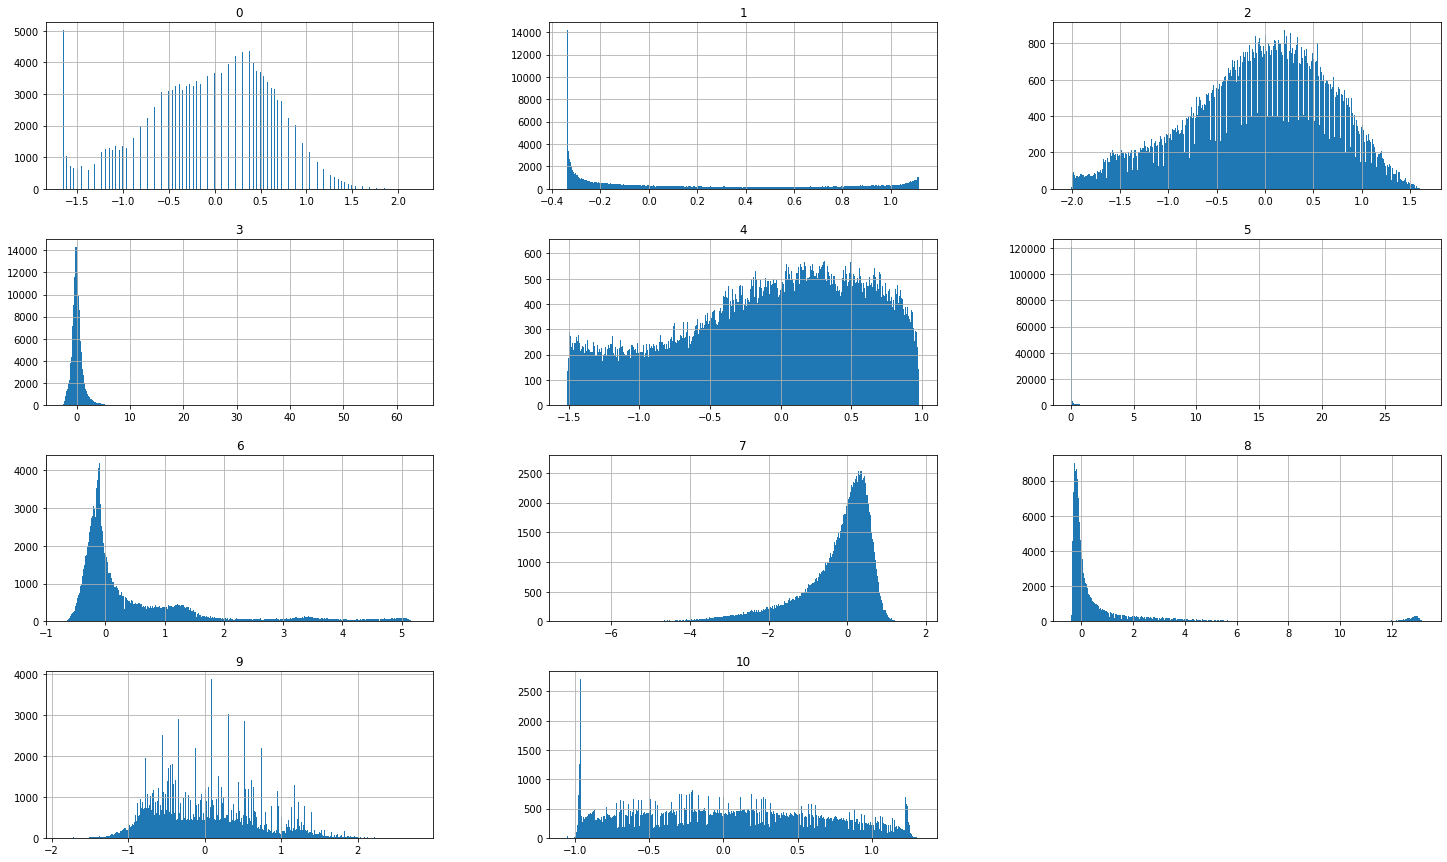

In [14]:
a.hist(bins=500, figsize=(25,15))

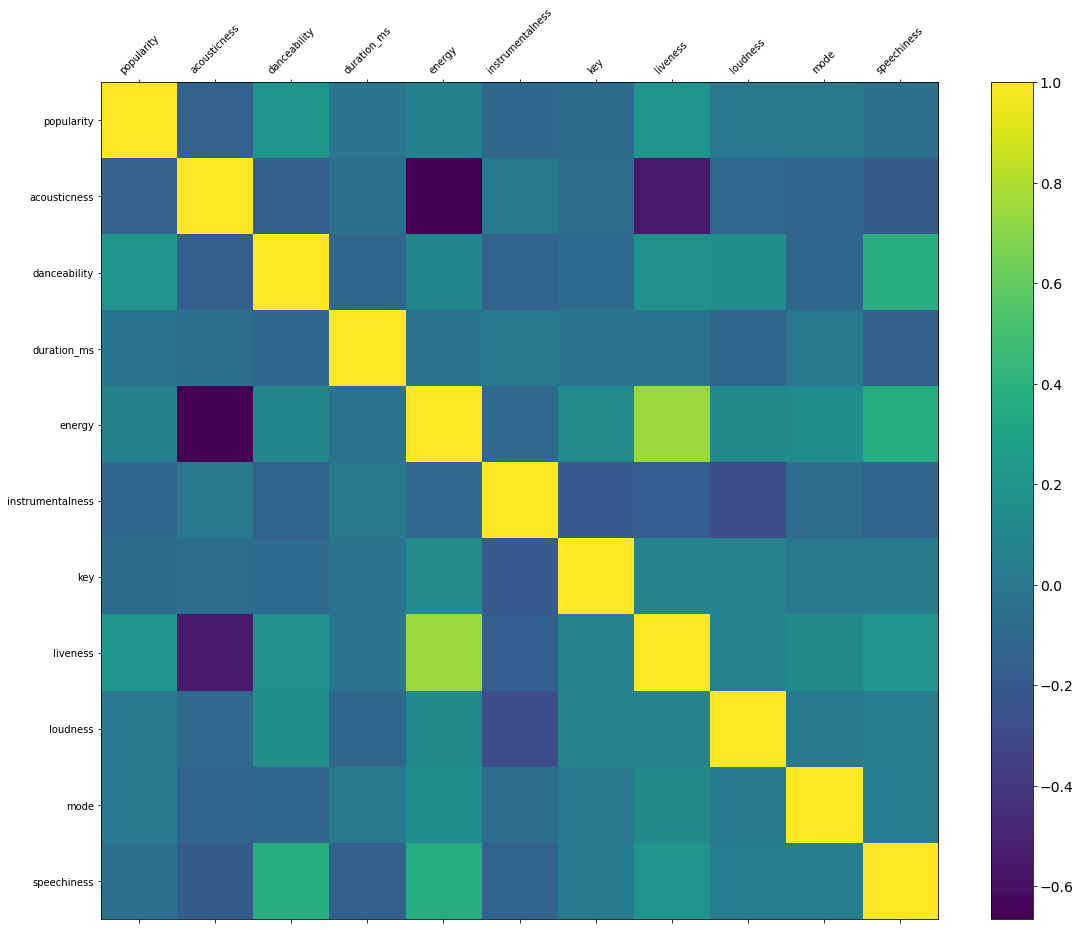

In [29]:
f = plt.figure(figsize=[19,15])
plt.matshow(a.corr(),fignum=f.number)
plt.xticks(range(a.shape[1]),df_train.columns,rotation=45)
plt.yticks(range(a.shape[1]),df_train.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [19]:
from sklearn.decomposition import PCA
dim=[]
var=[]
for comp in range(3, df_train_processed.shape[1]):
    dim.append(comp)
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df_train_processed)
    comp_check = pca.explained_variance_ratio_
    var.append(sum(comp_check))
    final_comp = comp
    if comp_check.sum() > 0.99:
        break

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
#n_components= 9, random_state=42

In [21]:
pca.fit(a)


PCA()

In [22]:
x_pca = pca.transform(a)

In [23]:
print(x_pca.shape)
print(x_pca)

(186084, 24)
[[-3.23416244e-01  6.24824866e-01 -1.43735948e-01 ...  1.15477620e-03
  -1.82501215e-03  1.37220957e-16]
 [-9.64868427e-02 -4.96808674e-01 -7.69232621e-02 ...  3.92792272e-02
  -1.55007661e-01  8.17098062e-17]
 [-3.26988768e-01  1.99449077e-02  3.10677175e-01 ...  5.57019425e-02
   1.93152602e-02 -2.51357101e-16]
 ...
 [ 7.76950223e-01 -1.57950294e-01 -1.02469165e-01 ...  6.07178494e-02
   9.44333058e-02  2.39840078e-16]
 [-3.68877350e-01 -3.42248443e-01  2.30048910e-01 ...  1.91324710e-01
  -1.65546555e-01  2.20487684e-16]
 [ 5.64878132e-01  8.64839727e-01 -7.00662868e-02 ... -2.35835811e-02
  -2.01609329e-02  8.32667268e-17]]


Text(0.5, 0, 'Cantidad de componentes principales')

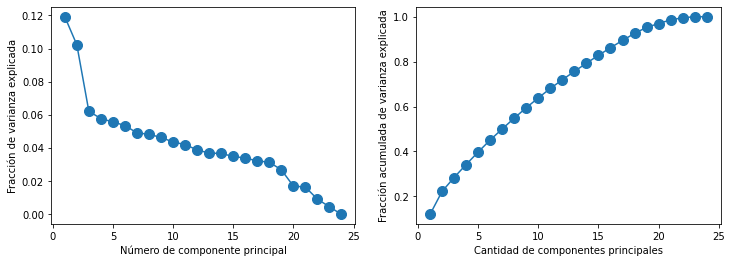

In [24]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 20)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

In [ ]:
pca = PCA(n_components= 10, random_state=42)


##Modelos

In [15]:
lg=LogisticRegression(max_iter=2000, random_state=1, penalty = 'l2', C = 0.01) #onevsrestclassifier

In [16]:
from sklearn.pipeline import make_pipeline
LGpipe = make_pipeline(full_pipeline,lg)
LGpipe.fit(X_train_full,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('Robust_scaler',
                                                                   RobustScaler())]),
                                                  ['popularity', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence'])])),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=2000, random_state=1))])

In [17]:
y_predLG = LGpipe.predict(X_valid_full)

In [18]:
print(accuracy_score(y_valid, y_predLG))

0.35067889513846595


In [ ]:
lg_cross_val = cross_val_score(LGpipe,X_train_full,y_train,cv=5,scoring='accuracy').mean()

In [ ]:
lg_cross_val

0.48673848103557527

In [ ]:
params = {}

params['logisticregression__C'] = [0.1,1,10]


In [ ]:
lGgrid = GridSearchCV(LGpipe, params, cv=5,scoring='accuracy' )
lGgrid.fit(X_train_full,y_train)

In [ ]:
lGgrid.best_score_

0.47883833693727

### DesicionTree

In [26]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion='gini',random_state=0)

dtcPipe = make_pipeline(full_pipeline,dtc)
dtcPipe.fit(X_train_full,y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('Robust_scaler',
                                                                   RobustScaler())]),
                                                  ['popularity', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

In [27]:
y_pred_dtc =  dtcPipe.predict(X_valid_full)

In [28]:
print(accuracy_score(y_valid, y_pred_dtc))

0.2837745853186687


In [ ]:
dtc_cross_val = cross_val_score(dtcPipe,X_train_full,y_train,cv=5,scoring='accuracy').mean()

In [ ]:
dtc_cross_val

0.2736076418249154

### RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=250, random_state=42)

rfcPipe = make_pipeline(full_pipeline,rfc)
rfcPipe.fit(X_train_full,y_train)




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('Robust_scaler',
                                                                   RobustScaler())]),
                                                  ['popularity', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=250, random_state=42))])

In [20]:
predict = rfcPipe.predict(X_valid_full)

In [21]:
print(accuracy_score(y_valid, predict))

0.3844086984559166


In [ ]:
from sklearn.metrics import roc_auc_score



In [ ]:
rfc_cross_val = cross_val_score(rfcPipe,X_train_full,y_train,cv=5,scoring='accuracy')

In [ ]:
rfc_cross_val

array([0.57264416, 0.56802752, 0.57137684, 0.57409251, 0.56748438])

In [ ]:
predict = rfc.predict(X_valid_full)
print(accuracy_score(y_valid, predict))

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knnPipe = make_pipeline(full_pipeline,pca,knn)
knnPipe.fit(X_train_full, y_train)
#y_pred_knn = knn.predict(X_valid_full)
#print(accuracy_score(y_valid, y_pred_knn))


NameError: ignored

In [ ]:
y_pred_knn = knnPipe.predict(X_valid_full)
print(accuracy_score(y_valid, y_pred_knn))


0.5432494057148402


In [ ]:
# Numero de arboles
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Numero de features considerado al dividir
max_features = ['auto', 'sqrt']
# numero maximo de niveles
#max_depth = [2,4]
# Numero minimo de niveles por nodo
#min_samples_split = [2, 5]
# Numero minimo de niveles por hoja
#min_samples_leaf = [1, 2]
# metodo de seleccion por arbol 
bootstrap = [True, False]

In [ ]:
n_estimators

[50, 100, 150, 200]

### GridSerchCv RandonForest

In [ ]:
#'randomforestclassifier__n_jobs': None
#'randomforestclassifier__n_estimators': 30,
params = {}


# Grilla
param_grid = {}
param_grid['randomforestclassifier__n_estimators'] = n_estimators
#param_grid['randomforestclassifier__max_features'] = max_features
#param_grid['randomforestclassifier__max_depth'] = max_depth
#param_grid['randomforestclassifier__min_samples_split'] = min_samples_split
#param_grid['randomforestclassifier__min_samples_leaf'] = min_samples_leaf = [1, 2]
param_grid['randomforestclassifier__bootstrap']  = bootstrap
          
          
               #'bootstrap': bootstrap

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc_Grid = GridSearchCV(estimator = rfcPipe, param_grid = param_grid, cv = 3, scoring='accuracy')
#, verbose=2, n_jobs = 4

In [ ]:
rfc_Grid.fit(X_train_full, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('mismax_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['danceability',
                                                                          'energy',
                                                                          'loudness',
                                                                          'speechiness',
                                                                          'acousticness',
                                                                          'instrumentalness',
                                                                          'liveness',

In [ ]:
rfcPipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('mismax_scaler',
                                                   MinMaxScaler())]),
                                  ['danceability', 'energy', 'key', 'loudness',
                                   'mode', 'speechiness', 'acousticness',
                                   'instrumentalness', 'liveness', 'valence',
                                   'tempo', 'duration_ms', 'time_signature'])]),
 'columntransformer__n_jobs': None,
 'columntransformer__numerical': Pipeline(steps=[('mismax_scaler', MinMaxScaler())]),
 'columntransformer__numerical__memory': None,
 'columntransformer__numerical__mismax_scaler': MinMaxScaler(),
 'columntransformer__numerical__mismax_scaler__clip': False,
 'columntransformer__numerical__mismax_scaler__copy': True,
 'columntransformer__numerical__mismax_scaler__feature_range': (0, 1),
 'columntransformer__numerical__steps': [('mismax_scaler

In [ ]:
rfc_Grid.best_score_

0.66555221823146

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=250,
     max_depth=5, random_state=0)

In [ ]:
XGBpipe = make_pipeline(full_pipeline, clf)
XGBpipe.fit(X_train_full,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('mismax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=250,
                         

In [ ]:
y_pred_GB =  XGBpipe.predict(X_valid_full)

In [ ]:
print(accuracy_score(y_valid, y_pred_GB))

0.681295304128585


In [ ]:
XGboost_cross_val = cross_val_score(XGBpipe,X_train_full,y_train,cv=5,scoring='accuracy')

In [ ]:
XGboost_cross_val

array([0.56015208, 0.56531185, 0.56078573, 0.55897529, 0.55562596])

In [ ]:
from sklearn.metrics import roc_auc_score